<a href="https://colab.research.google.com/github/thinethwic/ai-in-iris-data-knn-model/blob/branch01/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
initial_k = 5
model = KNeighborsClassifier(n_neighbors=initial_k)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial K={initial_k}, Accuracy: {accuracy*100:.2f}")

Initial K=5, Accuracy: 100.00


In [8]:
for k in range(1,32,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred_k = knn.predict(X_test)
  acc = accuracy_score(y_test,y_pred_k)
  print(f"Initial K={k}, Accuracy: {acc*100:.2f}")

Initial K=1, Accuracy: 97.78
Initial K=3, Accuracy: 100.00
Initial K=5, Accuracy: 100.00
Initial K=7, Accuracy: 100.00
Initial K=9, Accuracy: 100.00
Initial K=11, Accuracy: 100.00
Initial K=13, Accuracy: 100.00
Initial K=15, Accuracy: 100.00
Initial K=17, Accuracy: 100.00
Initial K=19, Accuracy: 100.00
Initial K=21, Accuracy: 100.00
Initial K=23, Accuracy: 100.00
Initial K=25, Accuracy: 97.78
Initial K=27, Accuracy: 95.56
Initial K=29, Accuracy: 91.11
Initial K=31, Accuracy: 91.11


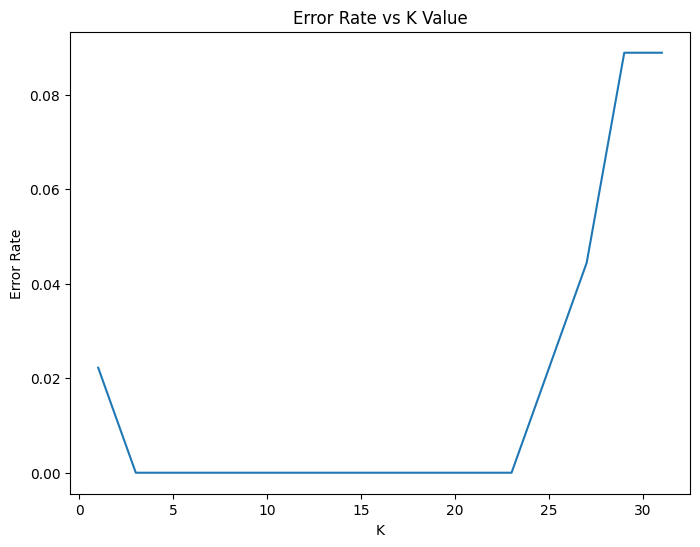

In [14]:
error_rates =[]
for k in range(1,32,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred_k = knn.predict(X_test)
  error = 1 - accuracy_score(y_test,y_pred_k)
  error_rates.append(error)

plt.figure(figsize=(8,6))
plt.plot(range(1,32,2), error_rates)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()